# Simple Linear Regression 

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [41]:
import pandas as pd

In [42]:
advertising = pd.read_csv("newhousing.csv")

Now, let's check the structure of the advertising dataset.

In [43]:
# Display the first 5 rows
advertising.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [44]:
# Display the last 5 rows
advertising.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
540,4403000,4880,3,1,1,1,0,0,0,0,2,1,0,1,1626.666667,0.333333
541,2660000,2000,2,1,2,1,0,0,0,0,0,0,1,0,1000.000000,0.500000
542,4480000,8250,3,1,1,1,0,0,0,0,0,0,0,0,2750.000000,0.333333
543,5110000,11410,2,1,2,1,0,0,0,0,0,1,0,0,5705.000000,0.500000
544,4410000,3968,3,1,2,0,0,0,0,0,0,0,1,0,1322.666667,0.333333


In [45]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
price              545 non-null int64
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null int64
guestroom          545 non-null int64
basement           545 non-null int64
hotwaterheating    545 non-null int64
airconditioning    545 non-null int64
parking            545 non-null int64
prefarea           545 non-null int64
semi-furnished     545 non-null int64
unfurnished        545 non-null int64
areaperbedroom     545 non-null float64
bbratio            545 non-null float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


In [46]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(545, 16)

In [47]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606,1819.852599,0.446361
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402,839.091825,0.159492
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,381.000000,0.166667
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1237.500000,0.333333
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.400000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2183.333333,0.500000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6600.000000,1.000000


# Visualising Data Using Seaborn

In [48]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

KeyError: 'TV'

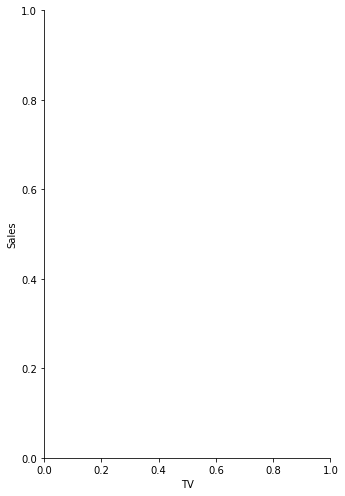

In [49]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

In [50]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              ##
# applying normalize ( ) to all columns 
advertising = advertising.apply(normalize)
advertising.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.041842,0.024018,0.006972,0.237920,-0.268502,0.141284,-0.177982,0.649541,-0.045872,-0.315596,-0.231193,-0.234862,0.583486,-0.326606,0.002168,0.264367
1,-0.024825,-0.076326,0.006972,-0.095413,0.064832,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,0.102141,-0.234862,0.583486,-0.326606,-0.076087,-0.135633
2,-0.103613,-0.103817,-0.193028,-0.095413,-0.268502,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,0.673394,0.000024,0.064367
3,-0.164219,-0.145054,-0.193028,-0.095413,-0.268502,-0.858716,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,0.673394,-0.048216,0.064367
4,-0.103613,-0.044711,-0.193028,-0.095413,-0.268502,-0.858716,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,-0.326606,0.069167,0.064367


# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [51]:
# Putting feature variable to X
X = advertising[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]


# Print the first 5 rows
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.024018,0.006972,0.237920,-0.268502,0.141284,-0.177982,0.649541,-0.045872,-0.315596,-0.231193,-0.234862,0.583486,-0.326606,0.002168,0.264367
1,-0.076326,0.006972,-0.095413,0.064832,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,0.102141,-0.234862,0.583486,-0.326606,-0.076087,-0.135633
2,-0.103817,-0.193028,-0.095413,-0.268502,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,0.673394,0.000024,0.064367
3,-0.145054,-0.193028,-0.095413,-0.268502,-0.858716,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,0.673394,-0.048216,0.064367
4,-0.044711,-0.193028,-0.095413,-0.268502,-0.858716,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,-0.326606,0.069167,0.064367


In [52]:
# Putting response variable to y
y = advertising['price']

# Print the first 5 rows
y.head()

0    0.041842
1   -0.024825
2   -0.103613
3   -0.164219
4   -0.103613
Name: price, dtype: float64

## Splitting Data into Training and Testing Sets

In [53]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [54]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [55]:
train_test_split   #Press Tab to auto-fill the code
#Press Tab+Shift to read the documentation

<function sklearn.cross_validation.train_test_split>

In [56]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

TypeError: unhashable type: 'slice'

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 15)
(381,)
(164, 15)
(164,)


## Performing Linear Regression

In [58]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Coefficients Calculation

In [59]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

-0.0016489394950632112
[ 0.45993152 -0.08175117  0.33516266  0.12057211  0.02495637  0.01779773
  0.02446661  0.06432291  0.07731398  0.05911861  0.06950849 -0.00142748
 -0.02724578 -0.1818235  -0.03449463]


$y = 6.923 + 0.0481 \times TV + 0.179$<br>

Now, let's use this equation to predict our sales.

## Predictions

In [60]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [61]:
type(y_pred)

numpy.ndarray

#### Computing RMSE and R^2 Values

ValueError: x and y must have same first dimension, but have shapes (60,) and (164,)

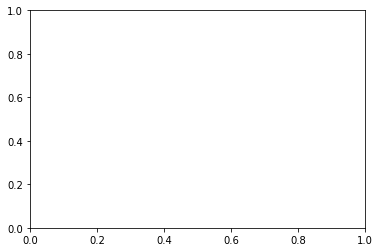

In [62]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

ValueError: x and y must have same first dimension, but have shapes (60,) and (164,)

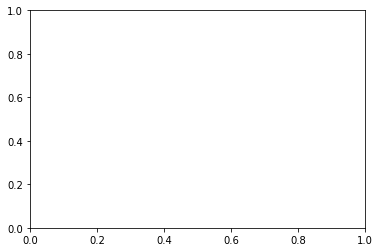

In [63]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [26]:
r_squared = r2_score(y_test, y_pred)

In [27]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1212109105402.3398
r_square_value : 0.6491318758954305


Text(0,0.5,'Predicted Y')

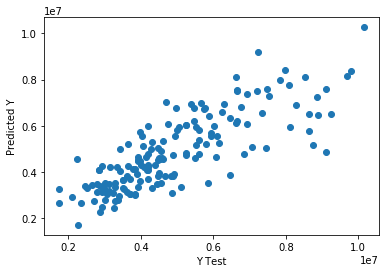

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')